<a href="https://colab.research.google.com/github/jwookkim0512/5WEEK-ASSIGNMENT/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

parameter: [[3.94188011]
 [8.73592461]]


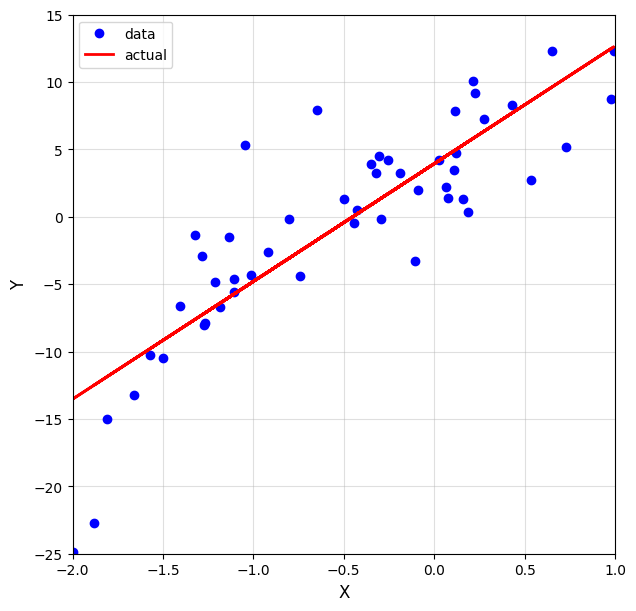

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


x = pd.read_csv('/content/data0405.csv', usecols=['x']).values  #csv 파일 불러오기
y = pd.read_csv('/content/data0405.csv', usecols=['y']).values
A = np.hstack([x**0, x]) #계산을 위한 행렬만듬
A = np.asmatrix(A)  #numpy 배열을 행렬(계산을 위한)

w = (A.T * A).I * A.T * y   #회귀 파라미터 계산 식
print('parameter:', w)  #출력


yp= A @ w  #예측값 계산


# 그래프
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'bo', label='data')                 # 파란 점: 실제 값
plt.plot(x, yp, 'r-', linewidth=2, label='actual')     # 빨간 선: 예측 모델
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-2.0, 1.0)
plt.ylim(-25, 15)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

parameter: [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


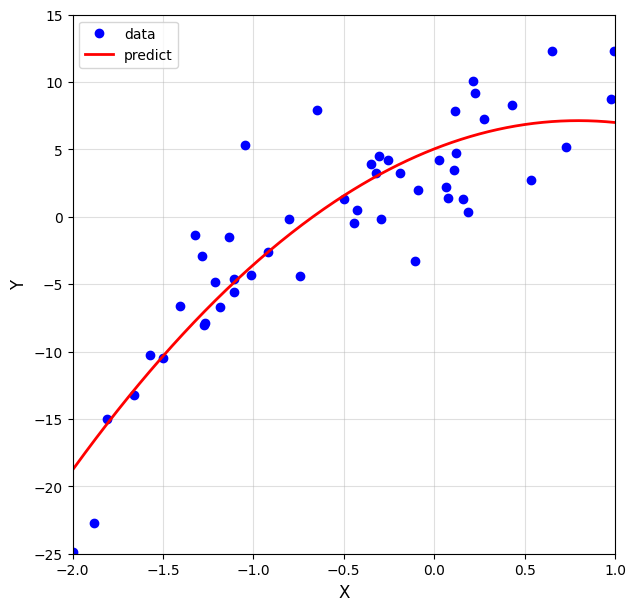

In [8]:
#다항회귀 비선형 2차 예측 모델 파라미터 구하고 예측 모델 그리기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


x = pd.read_csv('/content/data0405.csv', usecols=['x']).values  #csv 파일 불러오기
y = pd.read_csv('/content/data0405.csv', usecols=['y']).values
A = np.hstack([x**0, x, x**2]) #계산을 위한 행렬만듬 1차와 다르게 2차까지도 포함
A = np.asmatrix(A)  #numpy 배열을 행렬(계산을 위한)

w = (A.T * A).I * A.T * y   #회귀 파라미터 계산 식
print('parameter:', w)


yp = A @ w # 예측값 계산


# 그래프
xp = np.arange(-2.0, 5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'bo', label='data')                 # 파란 점으로 나타내는 실제 데이터
plt.plot(xp, yp, 'r-', linewidth=2, label='predict')     # 빨간선으로 나타내는 예측 모델
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-2.0, 1.0)
plt.ylim(-25, 15)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

parameter : [[  2.70561069]
 [  8.7466361 ]
 [ 24.11081469]
 [ -7.17740071]
 [-70.59489961]
 [-20.12073822]
 [ 59.53548381]
 [ 36.49128236]
 [ -8.88620274]
 [-11.06845324]
 [ -2.15841396]]


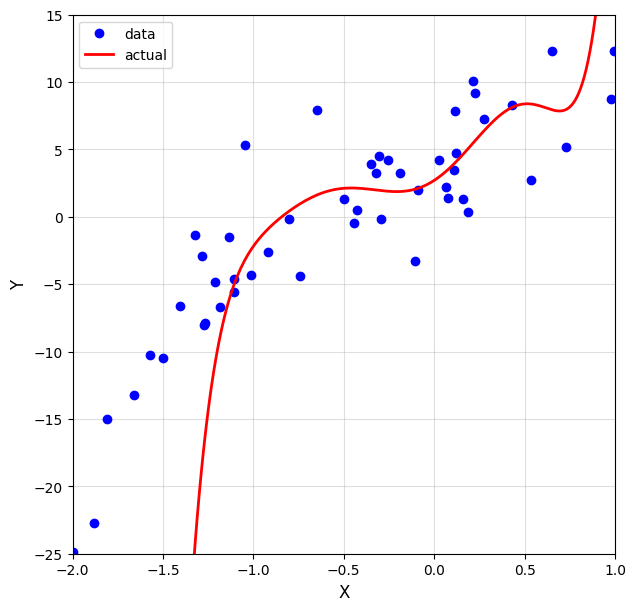

In [9]:
#다항회귀 비선형 10차 예측 모델 파라미터 구하고 예측 모델 그리기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


x = pd.read_csv('/content/data0405.csv', usecols=['x']).values  #csv 파일 불러오기
y = pd.read_csv('/content/data0405.csv', usecols=['y']).values
A = np.hstack([x**0, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9,x**10]) #계산을 위한 행렬만듬 10차까지 (근데 생각보다 오래 걸려서 다른 코드를 짬)
#A = np.hstack([x**i for i in range(11)]) 이 식이 훨씬 깔끔해보
A = np.asmatrix(A)  #numpy 배열을 행렬(계산을 위한)

w = (A.T * A).I * A.T * y   #회귀 파라미터 계산 식
print('parameter :', w)

# 예측값 계산
yp = A@w


# 그래프
xp = np.arange(-2.0, 5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp+ w[2,0]*xp**2 + w[3,0]*xp**3 + w[4,0]*xp**4 + w[5,0]*xp**5 + w[6,0]*xp**6 + w[7,0]*xp**7
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'bo', label='data')                 # 파란 점: 실제 값
plt.plot(xp, yp, 'r-', linewidth=2, label='actual')     # 빨간 선: 예측 모델
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-2.0, 1.0)
plt.ylim(-25, 15)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

[0.] [0.]


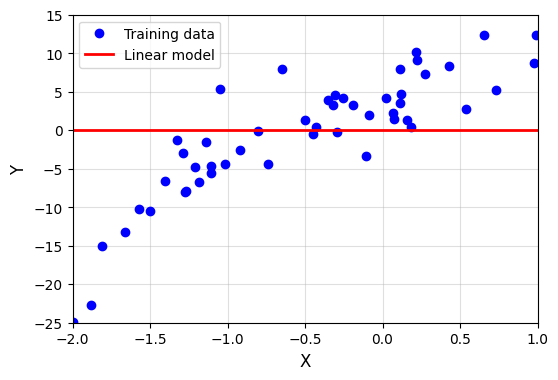

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x = pd.read_csv('/content/data0405.csv', usecols=['x']).values  #csv 파일 불러오기
y = pd.read_csv('/content/data0405.csv', usecols=['y']).values

A = np.hstack([x**0, x])  # data x의 앞에 1로 구성된 회로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 과제 요구 사항
epochs = 500   # 과제 요구 사항

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    yp = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (yp)) 	# 편미분 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(yp)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(-2.0, 5, 0.01).reshape(-1, 1)
yp= w1*xp + w0  # 예측값을 만든다.
#print(y_pred)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.xlim(-2.0, 1.0)
plt.ylim(-25, 15)
plt.grid(alpha = 0.4)
plt.show()

[-1.06508249]
[1.05560175]
[0.83477916]


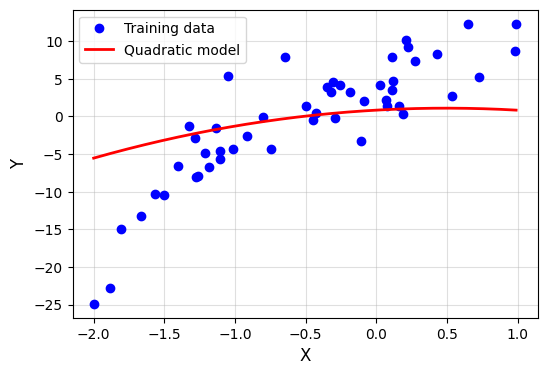

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
x = pd.read_csv('/content/data0405.csv', usecols=['x']).values
y = pd.read_csv('/content/data0405.csv', usecols=['y']).values

# 초기 파라미터 설정
w0 = 0
w1 = 0
w2 = 0  # 2차항 계수 추가

lrate = 0.001
epochs = 500
n = float(len(x))

# 경사 하강법
for i in range(epochs):
    yp = w2 * x**2 + w1 * x + w0        # 2차
    dw2 = (1/n) * sum(x**2 * (y_pred - y))   #2차 편미분
    dw1 = (1/n) * sum(x * (y_pred - y))
    dw0 = (1/n) * sum(y_pred - y)

    w2 -= lrate * dw2
    w1 -= lrate * dw1
    w0 -= lrate * dw0               #위의 선형 경사하강법 코딩에서 w2만 추가

print(w2)
print(w1)
print(w0)

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.plot(x, y, 'bo', label='data')

xp = np.arange(-2.0, 1.0, 0.01).reshape(-1, 1)
yp = w2 * xp**2 + w1 * xp + w0
plt.plot(xp, yp, 'r-', linewidth=2, label='model')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

[-1.04970844]
[0.9784752]
[-0.09587643]
[0.61615766]
[0.96730967]


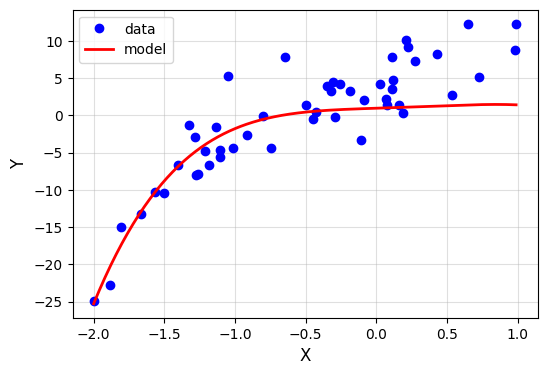

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
x = pd.read_csv('/content/data0405.csv', usecols=['x']).values
y = pd.read_csv('/content/data0405.csv', usecols=['y']).values

# 파라미터 초기화
w0 = 0
w1 = 0
w2 = 0
w3 = 0
w4 = 0  # 4차항 계수까지 추가

# 학습률 및 반복 횟수
lrate = 0.001
epochs = 500
n = float(len(x))

# 경사 하강법
for i in range(epochs):
    yp = w4 * x**4 + w3 * x**3 + w2 * x**2 + w1 * x + w0

    dw4 = (1/n) * sum(x**4 * (yp - y))
    dw3 = (1/n) * sum(x**3 * (yp- y))
    dw2 = (1/n) * sum(x**2 * (yp - y))
    dw1 = (1/n) * sum(x * (yp - y))
    dw0 = (1/n) * sum(yp - y)

    w4 -= lrate * dw4
    w3 -= lrate * dw3
    w2 -= lrate * dw2
    w1 -= lrate * dw1
    w0 -= lrate * dw0

# 최종 파라미터 출력
print(w4)
print(w3)
print(w2)
print(w1)
print(w0)

# 예측 모델 시각화
plt.figure(figsize=(6, 4))
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.plot(x, y, 'bo', label='data')

xp = np.arange(-2.0, 1.0, 0.01).reshape(-1, 1)
yp = w4 * xp**4 + w3 * xp**3 + w2 * xp**2 + w1 * xp + w0
plt.plot(xp, yp, 'r-', linewidth=2, label='model')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [ ]:
#경사하강법과 최소제곱법의 파라미터 값에 대한 비교

최소제곱법은 데이터를 기준으로 오차의 제곱들의 합이 최소가 되도록 w값을 w = (A.T * A).I * A.T * y  식을 이용하여 구하는 방법이다. 이때 A는 데이터 값이다.그에 반해 경사하강법은
파라미터 값을 지속적으로 바꿔주는 방법이다. 이때 A는 데이터 값이다. 지속적으로 오차값을 줄여나가는 방향으로 파라미터 값을 구해주는데 이때 학습률과 epoch값에 따라 파라미터 값이
달라진다.